In [32]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Mounting google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 5.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [33]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
# load data to pandas dataframe
diabetes_df = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [6]:
#checking for random data samples
diabetes_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
193,11,135,0,0,0,52.3,0.578,40,1
622,6,183,94,0,0,40.8,1.461,45,0
30,5,109,75,26,0,36.0,0.546,60,0
753,0,181,88,44,510,43.3,0.222,26,1
732,2,174,88,37,120,44.5,0.646,24,1


In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
print(f'Number of patients with Diabetes : {len(diabetes_df[diabetes_df["Outcome"]==1])}')
print(f'Number of patients without Diabetes : {len(diabetes_df[diabetes_df["Outcome"]==0])}')

Number of patients with Diabetes : 268
Number of patients without Diabetes : 500


The data is quite unbalanced given that the number og patients without diabetes is double than the ones with diabetes. This might skew the data in favor of class with higher number of samples. This needs to be balanced later in order for the model to learn the right pattrns from them

In [10]:
X = diabetes_df[diabetes_df.columns[:-1]].values
Y = diabetes_df[diabetes_df.columns[-1]].values

In [11]:
# Scaling the data to normalize the features into similar range
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=diabetes_df.columns)

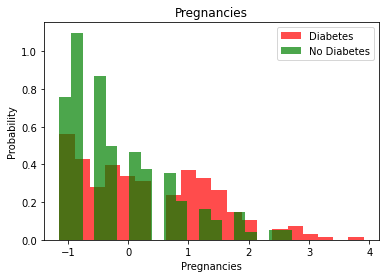

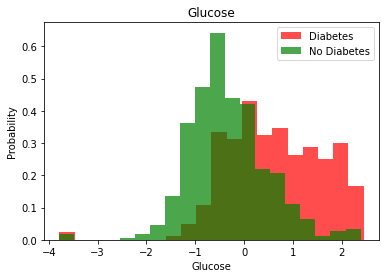

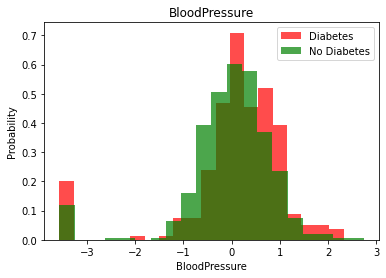

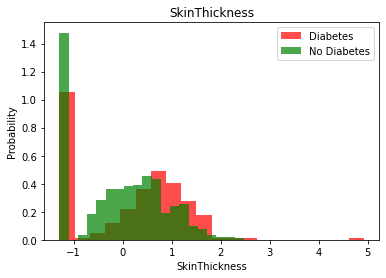

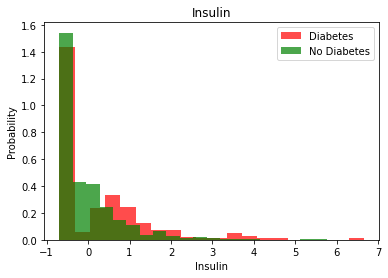

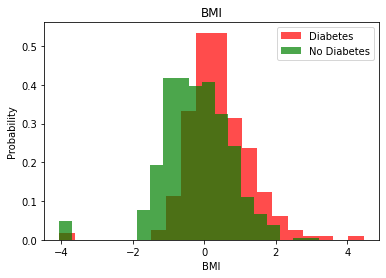

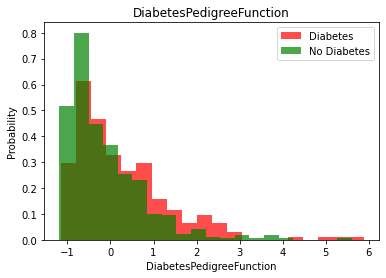

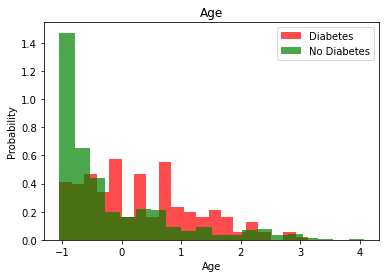

In [12]:
for i in range (len(diabetes_df.columns[:-1])):
  label = diabetes_df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"]==1][label], color = 'red', label = 'Diabetes', density = True, bins=20, alpha=0.7)
  plt.hist(transformed_df[transformed_df["Outcome"]==0][label], color = 'green' , label = 'No Diabetes', density = True, bins=20, alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [13]:
# Oversampling the data to make the number of samples balanced for both classes
over_sampler = RandomOverSampler()
X, Y = over_sampler.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=diabetes_df.columns)

In [14]:
X , len(X)

(array([[ 6.39947260e-01,  8.48323795e-01,  1.49640753e-01, ...,
          2.04012771e-01,  4.68491977e-01,  1.42599540e+00],
        [-8.44885053e-01, -1.12339636e+00, -1.60545747e-01, ...,
         -6.84421946e-01, -3.65060778e-01, -1.90671905e-01],
        [ 1.23388019e+00,  1.94372388e+00, -2.63941247e-01, ...,
         -1.10325546e+00,  6.04397318e-01, -1.05584152e-01],
        ...,
        [ 1.23388019e+00, -4.97453454e-01,  1.59717775e+00, ...,
          1.43512945e+00, -7.03314069e-01,  1.00055664e+00],
        [ 6.39947260e-01,  8.48323795e-01,  1.49640753e-01, ...,
          2.04012771e-01,  4.68491977e-01,  1.42599540e+00],
        [ 4.60143347e-02,  6.58951615e-02, -3.67336746e-01, ...,
          9.41978774e-04, -7.42575612e-01,  1.49679107e-01]]), 1000)

In [15]:
Y, len(Y)

(array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

In [16]:
print(f'Number of patients with Diabetes : {len(transformed_df[transformed_df["Outcome"]==1])}')
print(f'Number of patients without Diabetes : {len(transformed_df[transformed_df["Outcome"]==0])}')

Number of patients with Diabetes : 500
Number of patients without Diabetes : 500


In [17]:
X_temp, X_test, y_temp, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size=0.2, random_state=0)

## Model training 


### Using logistic regression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [26]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, y_train)
print('Accuracy score of the training data : ', training_accuracy)

Accuracy score of the training data :  0.7296875


In [27]:
validation_set_prediction = model.predict(X_valid)
validation_set_accuracy = accuracy_score(validation_set_prediction, y_valid)
print('Accuracy score of the validation data : ', validation_set_accuracy)

Accuracy score of the validation data :  0.75


In [28]:
test_set_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_set_prediction, y_test)
print('Accuracy score of the test data : ', test_accuracy)

Accuracy score of the test data :  0.785


<ipython-input-52-1497797da50b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


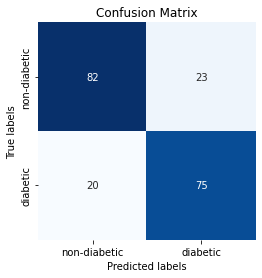

In [52]:
matrix_confusion = confusion_matrix(y_test, test_set_prediction)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-diabetic', 'diabetic']); ax.yaxis.set_ticklabels(['non-diabetic', 'diabetic']);

Here the number of false negatives i.e patients that are not diabetic but are labeld as diabetid is 23. And the false positives, i.e patients that are  diabetic but are labeld as non diabetid is 20. We need to create or tune a model in order to reduce these miss classifications. However, it needs to be noted that the greater false positive numbers with have more serious consequences in real application, if the diabetic patiens go undiagnosed. Non diabetic patiens if wrongly diagnosed will still reflect badly on the model but the damage control is just a second screening away. 

### Using Decision Tree

In [59]:
from sklearn import tree

In [150]:
decision_tree_model = tree.DecisionTreeClassifier(splitter='best', max_depth=6, min_samples_split=2)

In [151]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

#### Model Evaluation

In [152]:
training_prediction = decision_tree_model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, y_train)
print('Accuracy score of the training data : ', training_accuracy)

Accuracy score of the training data :  0.8578125


In [155]:
test_set_prediction = decision_tree_model.predict(X_test)
test_accuracy = accuracy_score(test_set_prediction, y_test)
print('Accuracy score of the test data : ', test_accuracy)

Accuracy score of the test data :  0.845


<ipython-input-156-1497797da50b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


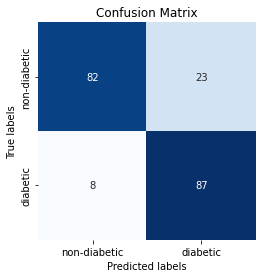

In [156]:
matrix_confusion = confusion_matrix(y_test, test_set_prediction)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-diabetic', 'diabetic']); ax.yaxis.set_ticklabels(['non-diabetic', 'diabetic']);

## USING Random Forest classifiee (Ensemble method)

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, random_state=0)

In [176]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

#### Model Evaluation

In [177]:
training_prediction = rf_model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, y_train)
print('Accuracy score of the training data : ', training_accuracy)

Accuracy score of the training data :  0.8515625


In [178]:
test_set_prediction = rf_model.predict(X_test)
test_accuracy = accuracy_score(test_set_prediction, y_test)
print('Accuracy score of the test data : ', test_accuracy)

Accuracy score of the test data :  0.85


<ipython-input-179-1497797da50b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


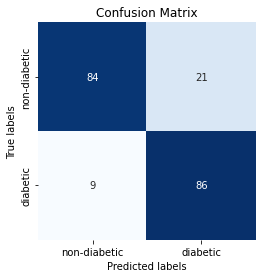

In [179]:
matrix_confusion = confusion_matrix(y_test, test_set_prediction)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-diabetic', 'diabetic']); ax.yaxis.set_ticklabels(['non-diabetic', 'diabetic']);